In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref=zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-02-26 08:29:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   209MB/s    in 0.5s    

2023-02-26 08:29:49 (209 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Become one with data

In [2]:
import os
for dirnames, dirpath, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirpath)} directories and {len(filenames)} images in {dirnames}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [3]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [4]:
import matplotlib.image as mpimage
import matplotlib.pyplot as plt

import random
def random_imgs (filepath, class_name):
  plt.figure(figsize=(10,7))
  for i in range(4):
    plt.subplot(2,2, i+1)
    target_file = filepath + '/' + class_name
    img = random.choice(os.listdir(target_file))
    img_path = target_file + '/' + img
    image_data = mpimage.imread(img_path)
  
    plt.imshow(image_data)
    plt.axis(False)
    plt.title(class_name + img)


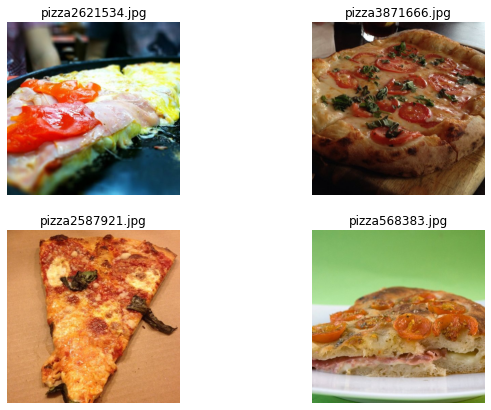

In [5]:
random_imgs(filepath="pizza_steak/train",
            class_name="pizza")

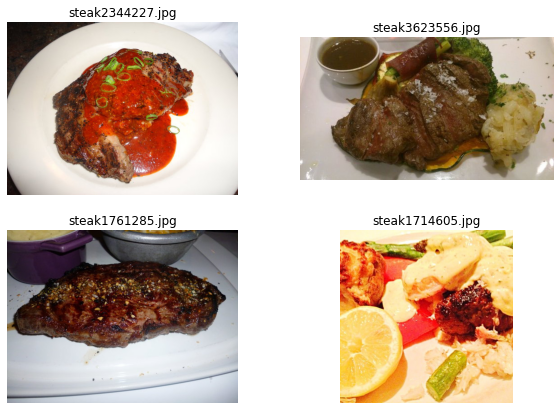

In [6]:
random_imgs(filepath="pizza_steak/train",
            class_name="steak")

## Data Preprocessing

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data_gen = ImageDataGenerator(rescale=1/255.,
                              height_shift_range = 0.2,
                              width_shift_range=0.2,
                              zoom_range=0.2,
                              shear_range=0.2,
                              rotation_range=0.2,
                              horizontal_flip=True)

In [79]:
train_data = data_gen.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42)

test_data = data_gen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [80]:
len(train_data)

47

# Create the model

In [81]:
tf.random.set_seed(42)
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile

In [82]:
model_0.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit The Modle

In [83]:
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 625ms/step - loss: 0.6800 - accuracy: 0.5487 - val_loss: 0.6119 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 33s 702ms/step - loss: 0.5604 - accuracy: 0.7200 - val_loss: 0.5044 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 29s 614ms/step - loss: 0.5054 - accuracy: 0.7627 - val_loss: 0.4185 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 29s 614ms/step - loss: 0.4809 - accuracy: 0.7613 - val_loss: 0.4013 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 32s 692ms/step - loss: 0.4558 - accuracy: 0.7853 - val_loss: 0.3840 - val_accuracy: 0.8420


In [77]:
def plot_history(history):
  loss = np.array(history.history['loss'])
  acc = np.array(history.history['accuracy'])

  val_loss = np.array(history.history['val_loss'])
  val_acc = np.array(history.history["val_accuracy"])

  epochs = np.array(range(len(loss))) + 1

  plt.figure(figsize=(12,7))
  plt.plot(epochs, loss, label="Loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.title("Loss vs Valid Loss")
  plt.legend()
  
  plt.figure(figsize=(12,7))
  plt.plot(epochs, acc, label="Acc")
  plt.plot(epochs, val_acc, label="Validation Acc")
  plt.title("Acc VS Val Acc")
  plt.legend()

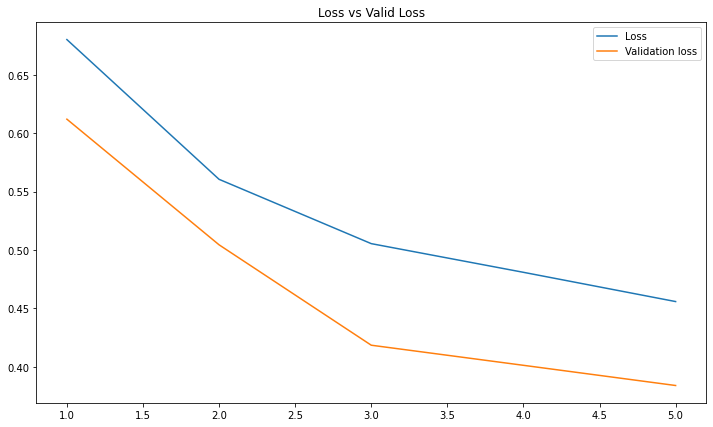

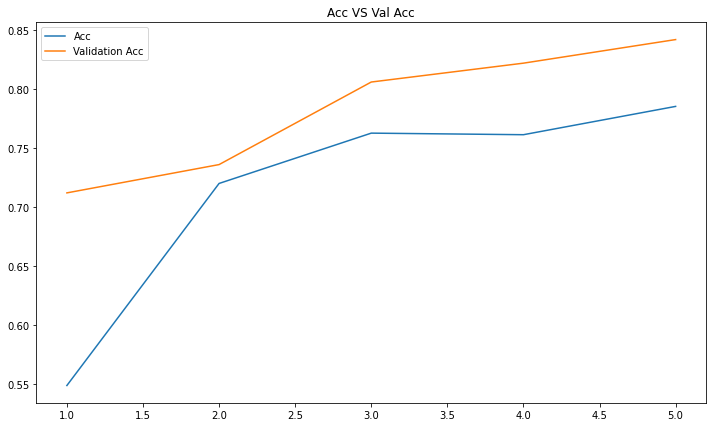

In [84]:
plot_history(history_0)

## Predict

In [103]:
def load_prep_img(filepath, imgsize=224):
  img=tf.io.read_file(filepath)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img, size=[imgsize, imgsize])
  img=img / 255
  return img

In [104]:
img = load_prep_img(filepath="pred/steak.jpeg")
img.shape


TensorShape([224, 224, 3])

In [107]:
y_pred = model_0.predict(tf.expand_dims(img, axis=0))
y_pred.round()

1/1 [==============================] - 0s 29ms/step


array([[1.]], dtype=float32)